In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [2]:
# read in 2019 data set, clean it up, and narrow it down to the specific rows of interest

data2019_df = pd.read_csv("DataFiles/2019.csv")
data2019_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
data2019_df.head(15)

skinny_data2019 = data2019_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2019


,index,Occupation,Total Employed (thou) 2019,% Men 2019,% Women 2019,% White 2019,% Black 2019,% Asian 2019,% Latinx 2019
0,0,"Total, 16 years and over","157,538",53.0,47.0,77.7,12.3,6.5,17.6
1,1,"Management, professional, and related occupations","64,218",48.2,51.8,79,9.6,8.7,10.1
2,3,Management occupations,"18,985",60,40,83.6,7.8,6.1,10.7
3,4,Chief executives,"1,602",72.4,27.6,88.8,4.1,5.8,6.2
4,63,Professional and related occupations,"37,237",42.6,57.4,76.7,10.5,10,9.9


In [3]:
# Read in 2010 data set (which we cleaned up in csv file at same time as we converted it from its original txt format) 
#and narrow to relevant rows

data2010_df = pd.read_csv("DataFiles/2010.csv")
data2010_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
data2010_df.head(12)

skinny_data2010 = data2010_df.loc[[0,1,3,4,58],:].reset_index()
skinny_data2010

,index,Occupation,Total Employed (thou) 2010,% Men 2010,% Women 2010,% White 2010,% Black 2010,% Asian 2010,% Latinx 2010
0,0,"Total, 16 years and over.........................","139,064",52.8,47.2,,10.8,4.8,14.3
1,1,"Management, professional, and related occupati...","51,743",48.5,51.5,,8.4,6.1,7.3
2,3,Management occupations...........................,"15,001",61.8,38.2,,6.4,4.4,7.6
3,4,Chief executives.................................,"1,505",74.5,25.5,,2.8,3.2,4.8
4,58,Professional and related occupations.............,"30,805",42.6,57.4,,9.2,7,7.1


In [4]:
# Repeat for years 2011-2018
data2011_df = pd.read_csv("DataFiles/2011.csv")
data2011_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2011 = data2011_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2011

data2012_df = pd.read_csv("DataFiles/2012.csv")
data2012_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2012 = data2012_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2012

data2013_df = pd.read_csv("DataFiles/2013.csv")
data2013_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2013 = data2013_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2013

data2014_df = pd.read_csv("DataFiles/2014.csv")
data2014_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2014 = data2014_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2014

data2015_df = pd.read_csv("DataFiles/2015.csv")
data2015_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2015 = data2015_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2015

data2016_df = pd.read_csv("DataFiles/2016.csv")
data2016_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2016 = data2016_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2016

data2017_df = pd.read_csv("DataFiles/2017.csv")
data2017_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2017 = data2017_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2017

data2018_df = pd.read_csv("DataFiles/2018.csv")
data2018_df.fillna(value='', axis=None, inplace=True, limit=None, downcast=None)
skinny_data2018 = data2018_df.loc[[0,1,3,4,63],:].reset_index()
skinny_data2018


,index,Occupation,Total Employed (thou) 2018,% Men 2018,% Women 2018,% White 2018,% Black 2018,% Asian 2018,% Latinx 2018
0,0,"Total, 16 years and over","155,761",53.1,46.9,78.0,12.3,6.3,17.3
1,1,"Management, professional, and related occupations","62,436",48.5,51.5,79.4,9.6,8.5,9.7
2,3,Management occupations,"18,263",60.0,40.0,83.9,7.6,5.9,10.3
3,4,Chief executives,"1,573",73.1,26.9,89.5,3.5,5.9,6.1
4,63,Professional and related occupations,"36,586",43.2,56.8,77.2,10.5,9.6,9.6


In [5]:
#Combine data for all ten years into one dataframe

all_skinnies = [skinny_data2010,skinny_data2011,skinny_data2012,skinny_data2013,skinny_data2014,skinny_data2015,skinny_data2016,skinny_data2017,skinny_data2018,skinny_data2019]
combined = pd.concat(all_skinnies, join='outer', axis=1).drop(['index'],axis=1)

# Swap columns and rows to make it easier to read and clean up index and column labels
combined_swap=combined.swapaxes("index","columns")
combined_swap = combined_swap.reset_index()
nan = float("NaN")
combined_swap.replace("", nan, inplace=True)
combined_swap.dropna(axis = 0, how ='any',inplace=True)
combined_swap = combined_swap.reset_index().drop(['level_0'], axis = 1).rename(columns={
    'index':'Demographic',
    0:'Total, 16 years and over',
    1:'Management & Professional Occupations',
    2:'Management Occupations',
    3:'Chief Executives',
    4:'Professional Occupations'})

combined_dfs = combined_swap.drop([combined_swap.index[0],combined_swap.index[7],combined_swap.index[14],combined_swap.index[21],combined_swap.index[28],combined_swap.index[35],combined_swap.index[42],combined_swap.index[49],combined_swap.index[57],combined_swap.index[65]])

# Write to a csv file so can view the whole thing outside of the notebook
combined_dfs.to_csv('DataFiles/Combined_dfs.csv',float_format='%.1f') 

combined_dfs



,Demographic,"Total, 16 years and over",Management & Professional Occupations,Management Occupations,Chief Executives,Professional Occupations
1,Total Employed (thou) 2010,"139,064","51,743","15,001","1,505","30,805"
2,% Men 2010,52.8,48.5,61.8,74.5,42.6
3,% Women 2010,47.2,51.5,38.2,25.5,57.4
4,% Black 2010,10.8,8.4,6.4,2.8,9.2
5,% Asian 2010,4.8,6.1,4.4,3.2,7
...,...,...,...,...,...,...
68,% Women 2019,47.0,51.8,40,27.6,57.4
69,% White 2019,77.7,79,83.6,88.8,76.7
70,% Black 2019,12.3,9.6,7.8,4.1,10.5
71,% Asian 2019,6.5,8.7,6.1,5.8,10


In [6]:
#To permit calculations, convert values to floats, first removing commas from strings representing numbers
combined_dfs['Total, 16 years and over']=combined_dfs['Total, 16 years and over'].str.replace(',','')
combined_dfs['Management & Professional Occupations']=combined_dfs['Management & Professional Occupations'].str.replace(',','')
combined_dfs['Management Occupations']=combined_dfs['Management Occupations'].str.replace(',','')
combined_dfs['Chief Executives']=combined_dfs['Chief Executives'].str.replace(',','')
combined_dfs['Professional Occupations']=combined_dfs['Professional Occupations'].str.replace(',','')

combined_dfs['Total, 16 years and over']=combined_dfs['Total, 16 years and over'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Management & Professional Occupations']=combined_dfs['Management & Professional Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Management Occupations']=combined_dfs['Management Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Chief Executives']=combined_dfs['Chief Executives'].apply(pd.to_numeric,downcast='float', errors='ignore')
combined_dfs['Professional Occupations']=combined_dfs['Professional Occupations'].apply(pd.to_numeric,downcast='float', errors='ignore')

type(combined_dfs.iloc[2,1])

numpy.float64

In [7]:
#Make data frames for each demographic group to make calling them into equations easier
men_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Men')]
women_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Women')]
white_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('White')]
black_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Black')]
asian_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Asian')]
latinx_df = combined_dfs.loc[combined_dfs['Demographic'].str.contains('Latinx')]

In [8]:
women_df.head(10)

,Demographic,"Total, 16 years and over",Management & Professional Occupations,Management Occupations,Chief Executives,Professional Occupations
3,% Women 2010,47.200001,51.500000,38.200001,25.500000,57.400002
10,% Women 2011,46.900002,51.400002,38.099998,24.200001,57.099998
17,% Women 2012,47.000000,51.500000,38.599998,27.400000,57.200001
24,% Women 2013,47.000000,51.400002,38.200001,26.799999,57.099998
31,% Women 2014,46.900002,51.599998,38.599998,26.299999,57.200001
38,% Women 2015,46.799999,51.500000,39.200001,27.900000,57.200001
45,% Women 2016,46.799999,51.500000,39.099998,27.299999,57.000000
52,% Women 2017,46.900002,51.599998,39.799999,28.000000,57.000000
60,% Women 2018,46.900002,51.500000,40.000000,26.900000,56.799999
68,% Women 2019,47.000000,51.799999,40.000000,27.600000,57.400002


In [9]:
# Calculate linear regression data for women, men, black, asian, latinx, whites. Include rsquared values 
# (For whites, use only years 2017-2019)

#WOMEN IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
toty_values = women_df['Total, 16 years and over']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, toty_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
wom_tot2030 = round((slope*2030+intercept),2)
print('For Women in Total Workforce')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted women's share of the workforce in 2030: {wom_tot2030}")

# # WOMEN CEOS

ceoy_values = women_df['Chief Executives']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, ceoy_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
wom_ceos2030 = round((slope*2030+intercept),2)
print('For Women CEOs')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted share of Chief Executive jobs held by women in 2030: {wom_ceos2030}")


# # WOMEN MGRS

mgry_values = women_df['Management Occupations']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, mgry_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
wom_mgrs2030 = round((slope*2030+intercept),2)
print('For Managerial Women')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted share of managerial jobs held by women in 2030: {wom_mgrs2030}")


# # WOMEN PROF

profy_values = women_df['Professional Occupations']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, profy_values)                                                
line_eq = "y = " + str(round(slope,2)) + "x + " + str((intercept,2))
wom_prof2030 = round((slope*2030+intercept),2)
                                               
print('For Professional Women:')
print(f"slope: {slope}, intercept: {intercept}, rvalue: {rvalue}")
print(f"Line equation: {line_eq}")
print(f"Rsquared value: {rvalue**2}")
print(f"Predicted share of professional jobs held by women in 2030: {wom_prof2030}")

For Women in Total Workforce
slope: -0.01818184130119555, intercept: 83.56731983531606, rvalue: -0.46897901112210333
Line equation: y = -0.02x + 83.57
Rsquared value: 0.21994131287306593
Predicted women's share of the workforce in 2030: 46.66
For Women CEOs
slope: 0.26606059218897965, intercept: -509.1890631935814, rvalue: 0.6805613598087247
Line equation: y = 0.27x + -509.19
Rsquared value: 0.4631637644647004
Predicted share of Chief Executive jobs held by women in 2030: 30.91
For Managerial Women
slope: 0.23515153364701705, intercept: -434.73276498967954, rvalue: 0.9461500636768004
Line equation: y = 0.24x + -434.73
Rsquared value: 0.8951999429956136
Predicted share of managerial jobs held by women in 2030: 42.62
For Professional Women:
slope: -0.02060602361505682, intercept: 98.65083472511985, rvalue: -0.33945522744457857
Line equation: y = -0.02x + (98.65083472511985, 2)
Rsquared value: 0.11522985143945057
Predicted share of professional jobs held by women in 2030: 56.82


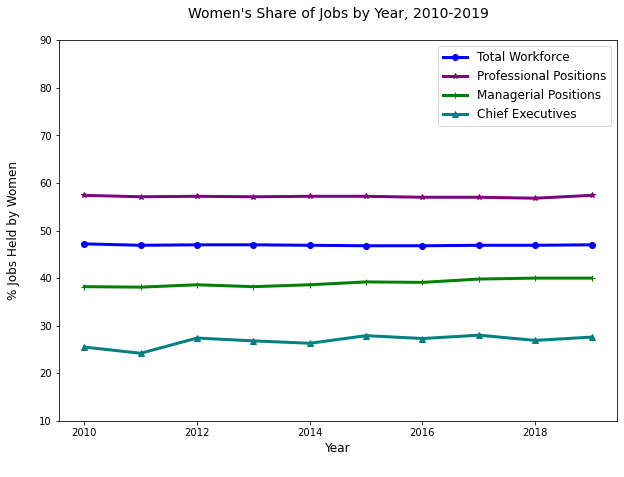

In [10]:
x_axis=x_values
plt.figure(figsize=(10,7))
plt.plot(x_axis, toty_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profy_values, marker = "*", color="purple", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgry_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceoy_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(10,90)

plt.legend(loc="best",fontsize=12)
plt.title("Women's Share of Jobs by Year, 2010-2019\n", fontsize=14)
plt.xlabel("Year\n",fontsize=12)
plt.ylabel("% Jobs Held by Women\n",fontsize=12)
plt.savefig("Images/womrep.png")
plt.show()


In [11]:
#AFRICAN-AMERICANS IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
totb_y_values = black_df['Total, 16 years and over']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, totb_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_tot2030 = round((bslope*2030+bintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")

#AFRICAN-AMERICAN CEOS
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
ceob_y_values = black_df['Chief Executives']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, ceob_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_ceos2030 = round((bslope*2030+bintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")


#AFRICAN-AMERICAN MGRS
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
mgrb_y_values = black_df['Management Occupations']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, mgrb_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_mgrs2030 = round((bslope*2030+bintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")


#AFRICAN-AMERICAN PROF
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
profb_y_values = black_df['Professional Occupations']
(bslope, bintercept, brvalue, bpvalue, bstderr) = linregress(x_values, profb_y_values)                                                
bline_eq = "y = " + str(round(bslope,2)) + "x + " + str(round(bintercept,2))
aa_prof2030 = round((bslope*2030+bintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {bslope}, intercept: {bintercept}, rvalue: {brvalue}")
print(f"Line equation: {bline_eq}")
print(f"Rsquared value: {brvalue**2}")

For A-As in Total Workforce
slope: 0.19030302799109258, intercept: -371.805449849909, rvalue: 0.9907186746646599
Line equation: y = 0.19x + -371.81
Rsquared value: 0.9815234923293003
For A-As in Total Workforce
slope: 0.12060605251427853, intercept: -239.6108927900141, rvalue: 0.7698100812923657
Line equation: y = 0.12x + -239.61
Rsquared value: 0.5926075612593588
For A-As in Total Workforce
slope: 0.17454544414173473, intercept: -344.5617971853776, rvalue: 0.9368045595079573
Line equation: y = 0.17x + -344.56
Rsquared value: 0.8776027827148979
For A-As in Total Workforce
slope: 0.1703030268351237, intercept: -333.32544746398924, rvalue: 0.9658411107508388
Line equation: y = 0.17x + -333.33
Rsquared value: 0.932849051216414


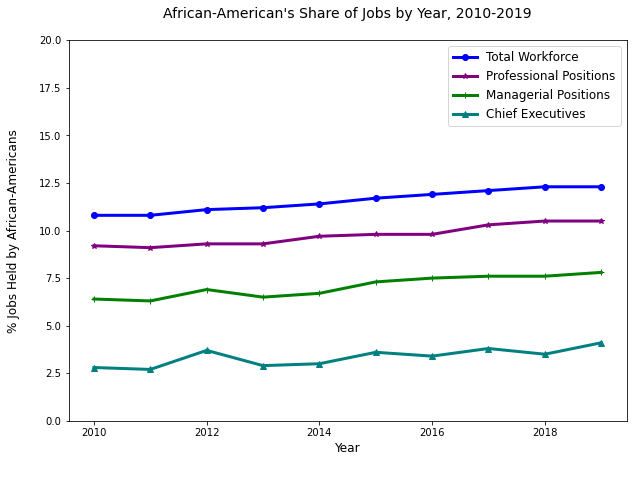

In [12]:
x_axis=x_values
plt.figure(figsize=(10,7))
plt.plot(x_axis, totb_y_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profb_y_values, marker = "*", color="purple", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgrb_y_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceob_y_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(0,20)
plt.legend(loc="best",fontsize=12)
plt.title("African-American's Share of Jobs by Year, 2010-2019\n",fontsize=14)
plt.xlabel("Year\n",fontsize=12)
plt.ylabel("% Jobs Held by African-Americans\n",fontsize=12)
plt.savefig("Images/AArep.png")
plt.show()


In [13]:
#ASIANS IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
tota_y_values = asian_df['Total, 16 years and over']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, tota_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_tot2030 = round((aslope*2030+aintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")

#ASIAN CEOS
ceoa_y_values = asian_df['Chief Executives']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, ceoa_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_ceo2030 = round((aslope*2030+aintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")


#ASIAN MGRS
mgra_y_values = asian_df['Management Occupations']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, mgra_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_mgrs2030 = round((aslope*2030+aintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")


#ASIAN PROF
profa_y_values = asian_df['Professional Occupations']
(aslope, aintercept, arvalue, apvalue, astderr) = linregress(x_values, profa_y_values)                                                
aline_eq = "y = " + str(round(aslope,2)) + "x + " + str(round(aintercept,2))
asian_profs2030 = round((aslope*2030+aintercept),2)
print('For A-As in Total Workforce')
print(f"slope: {aslope}, intercept: {aintercept}, rvalue: {arvalue}")
print(f"Line equation: {aline_eq}")
print(f"Rsquared value: {arvalue**2}")

For A-As in Total Workforce
slope: 0.18424241326072, intercept: -365.41634150418366, rvalue: 0.9753213391985539
Line equation: y = 0.18x + -365.42
Rsquared value: 0.9512517146960606
For A-As in Total Workforce
slope: 0.29878789005857526, intercept: -597.218204537305, rvalue: 0.8691803787466451
Line equation: y = 0.3x + -597.22
Rsquared value: 0.7554745307981614
For A-As in Total Workforce
slope: 0.18606060490463722, intercept: -369.3690885803917, rvalue: 0.9410583440048976
Line equation: y = 0.19x + -369.37
Rsquared value: 0.8855908068212403
For A-As in Total Workforce
slope: 0.34484848253654715, intercept: -686.1672679554333, rvalue: 0.9759231134595301
Line equation: y = 0.34x + -686.17
Rsquared value: 0.9524259233845428


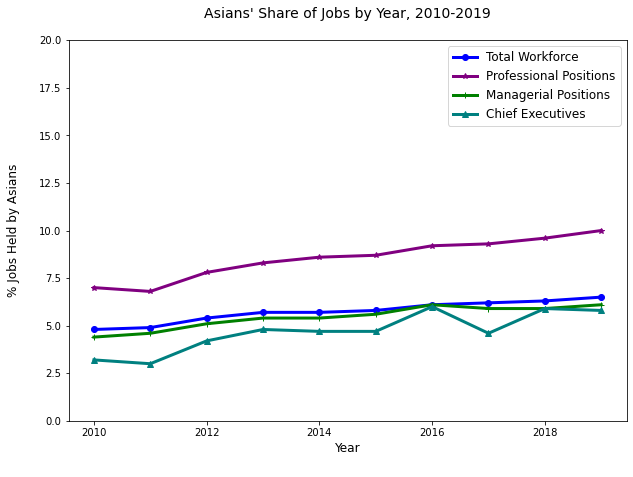

In [14]:
x_axis=x_values

plt.figure(figsize=(10,7))
plt.plot(x_axis, tota_y_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profa_y_values, marker = "*", color="purple", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgra_y_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceoa_y_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(0,20)
plt.legend(loc="best",fontsize=12)
plt.title("Asians' Share of Jobs by Year, 2010-2019\n",fontsize=14)
plt.xlabel("Year\n",fontsize=12)
plt.ylabel("% Jobs Held by Asians\n",fontsize=12)
plt.savefig("Images/asianrep.png")
plt.show()

In [15]:
#LATINX IN WORKFORCE
x_values = np.array([2010, 2011,2012,2013,2014,2015,2016,2017,2018,2019])
plt.figure(figsize=(10,7))
totl_y_values = latinx_df['Total, 16 years and over']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, totl_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_tot2030 = round((lslope*2030+lintercept),2)
print('For A-As in Total Workforce')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")

#LATINX CEOS
ceol_y_values = latinx_df['Chief Executives']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, ceol_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_ceo2030 = round((lslope*2030+lintercept),2)
print('For A-As in Total Workforce')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")


#LATINX MGRS
mgrl_y_values = latinx_df['Management Occupations']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, mgrl_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_mgr2030 = round((lslope*2030+lintercept),2)
print('For A-As in Total Workforce')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")


#lATINX PROF
profl_y_values = latinx_df['Professional Occupations']
(lslope, lintercept, lrvalue, lpvalue, lstderr) = linregress(x_values, profl_y_values)                                                
lline_eq = "y = " + str(round(lslope,2)) + "x + " + str(round(lintercept,2))
lat_prof2030 = round((lslope*2030+lintercept),2)
print('For A-As in Total Workforce')
print(f'slope: {lslope}, intercept: {lintercept}, rvalue: {lrvalue}')
print(f"Line equation: {lline_eq}")
print(f"Rsquared value: {lrvalue**2}")

For A-As in Total Workforce
slope: 0.3660605864091353, intercept: -721.3490513021295, rvalue: 0.9884017320772893
Line equation: y = 0.37x + -721.35
Rsquared value: 0.9769379839733856
For A-As in Total Workforce
slope: 0.18969694484363903, intercept: -377.074495454268, rvalue: 0.7847273119942245
Line equation: y = 0.19x + -377.07
Rsquared value: 0.615796954189681
For A-As in Total Workforce
slope: 0.34181816505663326, intercept: -679.3726935733449, rvalue: 0.9742283926662373
Line equation: y = 0.34x + -679.37
Rsquared value: 0.9491209610770402
For A-As in Total Workforce
slope: 0.295151525555235, intercept: -585.972748192874, rvalue: 0.9862321581842086
Line equation: y = 0.3x + -585.97
Rsquared value: 0.9726538698366819


<Figure size 720x504 with 0 Axes>

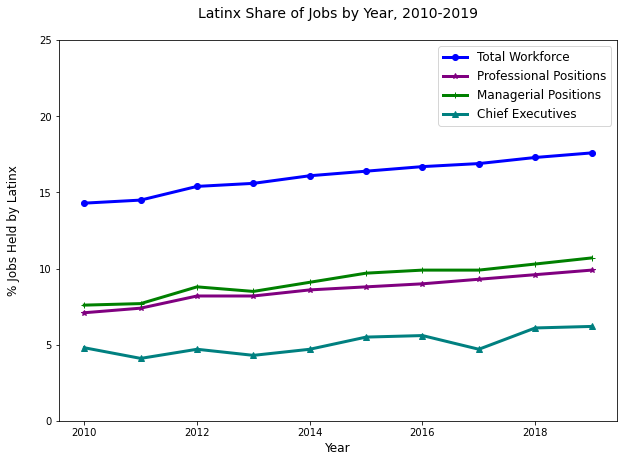

In [16]:
x_axis=x_values
plt.figure(figsize=(10,7))
plt.plot(x_axis, totl_y_values, marker = "o", color="b",linewidth=3,label="Total Workforce")
plt.plot(x_axis,profl_y_values, marker = "*", color="purple", linewidth=3,label = "Professional Positions")
plt.plot(x_axis,mgrl_y_values, marker = "+", color="g", linewidth=3,label = "Managerial Positions")
plt.plot(x_axis,ceol_y_values, marker = "^", color="teal", linewidth=3,label = "Chief Executives")
plt.ylim(0,25)
plt.legend(loc="best",fontsize=12)
plt.title("Latinx Share of Jobs by Year, 2010-2019\n",fontsize=14)
plt.xlabel("Year",fontsize=12)
plt.ylabel("% Jobs Held by Latinx\n",fontsize=12)
plt.savefig("Images/latrep.png")
plt.show()

In [17]:
print(f'''wom tot {wom_tot2030}
'wom ceos' {wom_ceos2030}
'wom mgrs' {wom_mgrs2030}
'wom profs' {wom_prof2030}
'af am tot' {aa_tot2030}
'af am ceos' {aa_ceos2030}
'af am mgrs' {aa_mgrs2030}
'af am profs' {aa_prof2030}
asian tot {asian_tot2030}
asian_mgrs {asian_mgrs2030}
asian_ceos {asian_ceo2030}
asian_profs {asian_profs2030}
lat_tot {lat_tot2030}
lat_mgrs {lat_mgr2030}
lat_ceos {lat_ceo2030}
lat_prof {lat_prof2030}
''')




wom tot 46.66
'wom ceos' 30.91
'wom mgrs' 42.62
'wom profs' 56.82
'af am tot' 14.51
'af am ceos' 5.22
'af am mgrs' 9.77
'af am profs' 12.39
asian tot 8.6
asian_mgrs 8.33
asian_ceos 9.32
asian_profs 13.88
lat_tot 21.75
lat_mgrs 14.52
lat_ceos 8.01
lat_prof 13.18



In [18]:
# CHANGE IN REPRESENTATION 2010-2019
job_level = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_change2019 = [-0.4, 4.7, 8.2, 0.0]
af_am_change2019 = [13.9, 21.9, 46.4, 14.1]
asian_change2019 = [35.4, 38.6, 81.3, 42.9]
latinx_change2019 = [23.1, 40.8, 29.2, 39.4]

# change in ratio between job level share and share of total workforce, 2010 to 2019
job_level2 = ["Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_ratiochange2019 = [0,5.2,8.7, 0.43]
af_am_ratiochange2019 = [0,7.0, 28.6,0.2]
asian_ratiochange2019 = [0,2.4,33.8,5.5]
latinx_ratiochange2019 = [0,14.4,4.9,13.3]


# PREDICTED CHANGE 2019-2030	
job_level = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_change2030 = [-0.7, 6.5, 12.0, -1.0]
af_am_change2030 = [18.0, 25.3, 27.3, 18.0]
asian_change2030 = [32.3, 36.6, 60.7, 38.8]
latinx_change2030 = [23.6, 35.7, 29.2, 33.1]

# PREDICTED CHANGE IN RATIO BETWEEN JOB LEVEL SHARE AND SHARE OF TOTAL WORKFORCE, 2019-2030
job_level2 = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
women_ratiochange30 = [7.3,12.8,-0.3]
af_am_ratiochange30 = [6.2,7.9,0]
asian_ratiochange30 = [3.2,21.5,4.9]
latinx_ratiochange30 = [9.8,4.5,7.7]



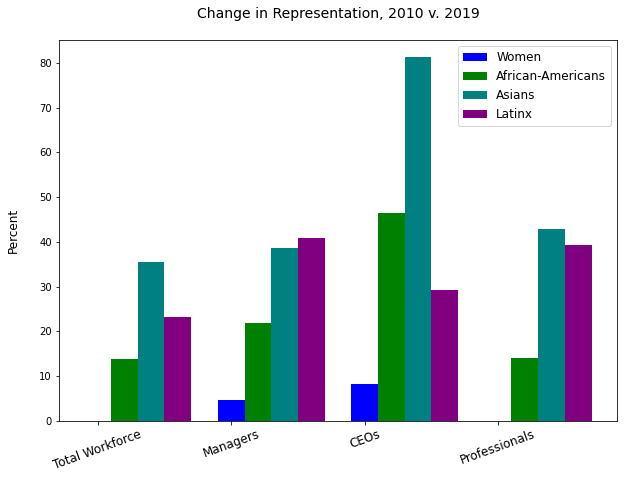

In [19]:
# Bar charts to illustrate difference between representation in 2010, 2019, and 2030, both as delta in representation
# and as delta in ratio to total workforce


job_level = ["Total Workforce","Managers","CEOs","Professionals"]
demographics = ["Women","African-Americans","Asians","Latinx"]
# women_change2019 = [-0.4, 4.7, 8.2, 0.0]
# af_am_change2019 = [13.9, 21.9, 46.4, 14.1]
# asian_change2019 = [35.4, 38.6, 81.3, 42.9]
# latinx_change2019 = [23.1, 40.8, 29.2, 39.4]
data =[[-0.4, 4.7, 8.2, 0.0],[13.9, 21.9, 46.4, 14.1],[35.4, 38.6, 81.3, 42.9],[23.1, 40.8, 29.2, 39.4]]

X = np.arange(4)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Total Workforce","Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data[0], color = 'b', width = 0.2, align="center")
plt.bar(X + 0.20, data[1], color = 'g', width = 0.2,align="center")
plt.bar(X + 0.40, data[2], color = 'teal', width = 0.2,align="center")
plt.bar(X + 0.60, data[3], color = 'purple', width = 0.2,align="center")
plt.title("Change in Representation, 2010 v. 2019\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,85)
plt.savefig("Images/bar_change_2019")
plt.show()


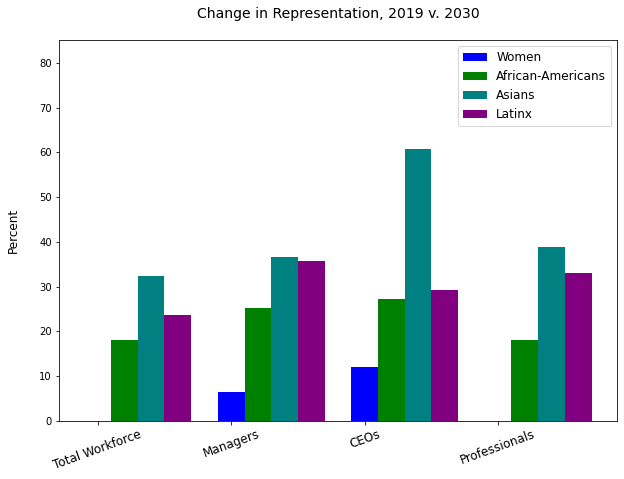

In [20]:
data2030 = [[-0.7, 6.5, 12.0, -1.0],[18.0, 25.3, 27.3, 18.0],[32.3, 36.6, 60.7, 38.8],[23.6, 35.7, 29.2, 33.1]]
demographics = ["Women","African-Americans","Asians","Latinx"]
# women_change2030 = [-0.7, 6.5, 12.0, -1.0]
# af_am_change2030 = [18.0, 25.3, 27.3, 18.0]
# asian_change2030 = [32.3, 36.6, 60.7, 38.8]
# latinx_change2030 = [23.6, 35.7, 29.2, 33.1]

X = np.arange(4)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Total Workforce","Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, data2030[0], color = 'b', width = 0.2, align="center")
plt.bar(X + 0.20, data2030[1], color = 'g', width = 0.2,align="center")
plt.bar(X + 0.40, data2030[2], color = 'teal', width = 0.2,align="center")
plt.bar(X + 0.60, data2030[3], color = 'purple', width = 0.2,align="center")
plt.title("Change in Representation, 2019 v. 2030\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,85)
plt.savefig("Images/bar_change_2030")
plt.show()


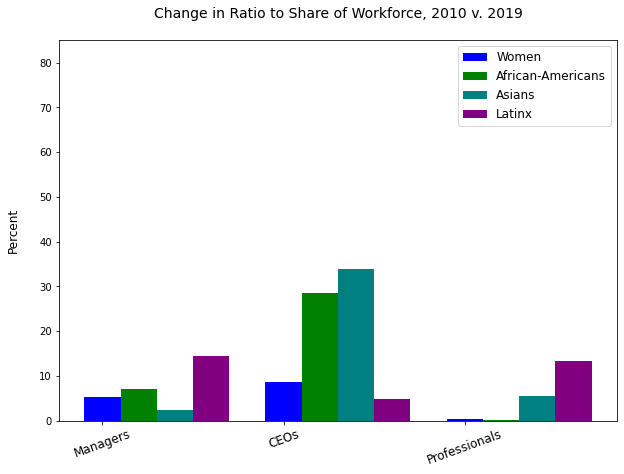

In [21]:
dataratio2019 = [[5.2,8.7, 0.43],[7.0, 28.6,0.2],[2.4,33.8,5.5],[14.4,4.9,13.3]]
demographics = ["Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, dataratio2019[0], color = 'b', width = 0.2, align="center")
plt.bar(X + 0.20, dataratio2019[1], color = 'g', width = 0.2,align="center")
plt.bar(X + 0.40, dataratio2019[2], color = 'teal', width = 0.2,align="center")
plt.bar(X + 0.60, dataratio2019[3], color = 'purple', width = 0.2,align="center")
plt.title("Change in Ratio to Share of Workforce, 2010 v. 2019\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,85)
plt.savefig("Images/bar_ratiochange_2019")
plt.show()

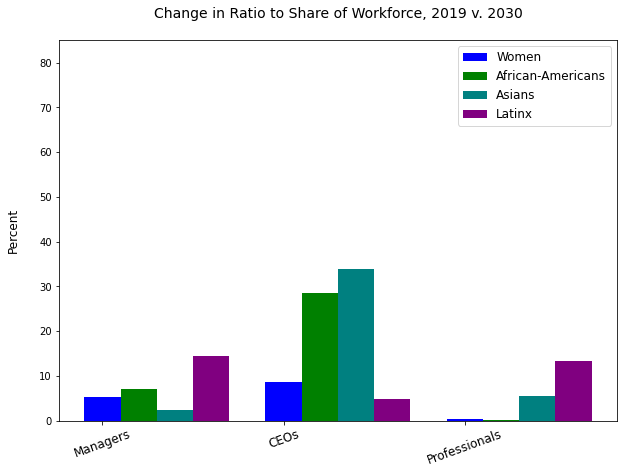

In [22]:
dataratio2030 = [[7.3,12.8,-0.3], [6.2,7.9,0],[3.2,21.5,4.9],[9.8,4.5,7.7]]
demographics = ["Women","African-Americans","Asians","Latinx"]

X = np.arange(3)
plt.figure(figsize=(10,7))
tick_locations = [value for value in X]
plt.xticks(tick_locations, ["Managers","CEOs","Professionals"],fontsize=12)
plt.bar(X + 0.00, dataratio2019[0], color = 'b', width = 0.2, align="center")
plt.bar(X + 0.20, dataratio2019[1], color = 'g', width = 0.2,align="center")
plt.bar(X + 0.40, dataratio2019[2], color = 'teal', width = 0.2,align="center")
plt.bar(X + 0.60, dataratio2019[3], color = 'purple', width = 0.2,align="center")
plt.title("Change in Ratio to Share of Workforce, 2019 v. 2030\n",fontsize=14)
plt.legend(demographics, loc="best",fontsize=12)
plt.ylabel("Percent\n",fontsize=12)
plt.xticks(rotation = 20)
plt.ylim(0,85)
plt.savefig("Images/bar_ratiochange_2030")
plt.show()